In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
df = pd.read_excel('AirQuality.xlsx', na_values = '-200.0')


# adding new features for plotting and finding which days are best to live
df['DateInt'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m%d').astype(int)
df['hour'] =pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['week'] = df['Date'].dt.week
df['month'] = df['Date'].dt.month

#Month of July and August have minimum CO levels
#From the complete year perspective - Weeks 4, 7-10, 22-23, 31-36 are good for living

# plotting CO(GT) values against time features
df.reset_index().plot.scatter(x = 'month', y = 'CO(GT)')
df.reset_index().plot.scatter(x = 'hour', y = 'CO(GT)')
df.reset_index().plot.scatter(x = 'week', y = 'CO(GT)')


#dropping as per suggestion
df = df.drop(['PT08.S4(NO2)','PT08.S5(O3)','C6H6(GT)'], axis=1)
#Using correlation matrix to find which attributes are related to CO, which is the dependent variable
# dropping other attributes/features for building regression model

corr = df.corr()
print(sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns))
df = df.drop(['Date', 'Time','T','RH','AH','NMHC(GT)'], axis=1)

#df[df < 0] = df.mean()
df.fillna(df.mean(), inplace=True)
dfy = df.drop(['CO(GT)','hour','week','month','DateInt'],axis=1)
dfx = df[['CO(GT)']]

#sns.pairplot(df)




AxesSubplot(0.125,0.11;0.62x0.77)


In [6]:
#Simple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
import math

y = df[['CO(GT)']]#.values#.reshape(-1,1)
X = dfy.iloc[:,:]#.values#.reshape(-1,1)
print (y.head(5))

y1 = df[['CO(GT)']].values.reshape(-1,1)
x1 = dfy.iloc[:,:].values.reshape(-1,5)

print(y1.shape, x1.shape) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)

print(X_train.shape, y_train.shape)
print (X_train.head())
reg = LinearRegression().fit(X_train,y_train)
print ('score= ',reg.score(X_test,y_test))
print ('slope= ',reg.coef_)
p = reg.predict(X_test)
print( 'rms= ',math.sqrt(mean_squared_error(y_test, p)))
print('r2: ', r2_score(y_test,p))


   CO(GT)
0     2.6
1     2.0
2     2.2
3     2.2
4     1.6
(9357, 1) (9357, 5)
(2807, 5) (2807, 1)
      PT08.S1(CO)  PT08.S2(NMHC)     NOx(GT)  PT08.S3(NOx)     NO2(GT)
867       1606.50        1289.50  264.000000        587.25  134.000000
2974       942.00         911.50  144.000000        841.50  106.000000
5236       948.75         753.50  246.881252        884.00  113.075515
5093      1247.00         960.75  167.000000        665.50   71.000000
5433       943.00         745.50  246.881252        852.00  113.075515
score=  0.7778520901830115
slope=  [[0.0010964  0.00260223 0.00279703 0.00103589 0.00171239]]
rms=  0.6254064299138614
r2:  0.7778520901830116


In [25]:
# Q2 - 2 - simple Linear Regression with Stochastic Gradient Descent

import numpy as np
from sklearn import linear_model

clf = linear_model.SGDRegressor(max_iter=50000,tol= 0.00001,learning_rate ='constant',eta0 = 0.000000001)
clf.fit(X_train,y_train)
print ('score= ',clf.score(X_test,y_test))
print ('coefficients= ',clf.coef_)
g = clf.predict(X_test)
print( 'rms= ',math.sqrt(mean_squared_error(y_test, g)))
print('r2: ', r2_score(y_test,g))

score=  0.7408336209130407
coefficients=  [ 0.00012764  0.00181705  0.00303962 -0.00051348  0.00030575]
rms=  0.6755080935523186
r2:  0.7408336209130406


/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-0.18273246]
 [-0.02068219]
 [ 0.70411392]
 [ 0.14694282]
 [ 0.87440617]]
cost:  235.55526111960748


Text(0, 0.5, 'Cost')

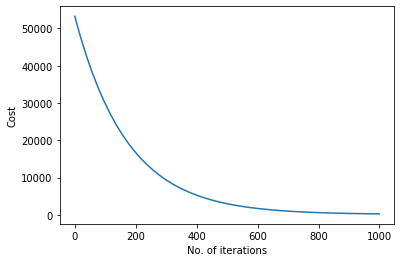

In [3]:
# Q-2 - 1- Linear Regression with Gradient Descent

y = df[['CO(GT)']].values.reshape(-1,1)
x = dfy.iloc[:,:].values.reshape(-1,5)


#y = df[['CO(GT)']].values[:,0]
#x = dfy.iloc[:,:].values

cost = np.ones(1000)

def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y 
        cost[i] = np.sum(loss ** 2) / (2 * m)
        #print("Iteration %d | Cost: %f" % (i, cost[i]))
        gradient = np.dot(xTrans, loss) / m 
        theta = theta - alpha * gradient
    return theta

print(gradientDescent(x,y,np.ones((5,1)),0.0000001,935700,1000))
print ('cost: ',cost[999])
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1000)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')


In [58]:
# Q2 - 3 - Mini batch gradient descent
from sklearn.linear_model import SGDRegressor

y = df[['CO(GT)']].values#.reshape(-1,1)
X = dfy.iloc[:,:].values#.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

 
def iter_minibatches(chunksize):
    # Provide chunks one by one
    chunkstartmarker = 0
    while chunkstartmarker < 2000:
        #y_chunk = df.iloc[chunkstartmarker:chunkstartmarker+chunksize,0].values.reshape(-1,)
        #X_chunk = dfy.iloc[chunkstartmarker:chunkstartmarker+chunksize,:].values.reshape(-1,5)
        
        y_chunk = y_train[chunkstartmarker:chunkstartmarker+chunksize,:]

        X_chunk = X_train[chunkstartmarker:chunkstartmarker+chunksize,:]
        #print(X_chunk.shape,y_chunk.shape)
        yield X_chunk, y_chunk
        chunkstartmarker += chunksize
 

batcherator = iter_minibatches(chunksize=100)
model = SGDRegressor(tol= 0.00001,learning_rate ='constant',eta0 = 0.000000001)
 
    # Train model
for X_chunk, y_chunk in batcherator:
    model.partial_fit(X_chunk, y_chunk)
    
    
y_predicted = model.predict(X_test)
    
print ('score= ',model.score(X_test,y_test))
print ('coefficients= ',model.coef_)
g = model.predict(X_test)
print( 'rms= ',math.sqrt(mean_squared_error(y_test, g)))
print('r2: ', r2_score(y_test,g))
    
  
    
    

score=  0.46206651541578714
coefficients=  [0.00093417 0.00092309 0.00041288 0.0001961  0.00012031]
rms=  0.9733558699426041
r2:  0.46206651541578714


/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vecto